In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] ='D2coding'

## 컬럼의 종류
- fixed acidity : 고정 산도
- volatile acidity : 휘발성 산도
- citric acid : 시트르산
- residual sugar : 잔류 당분
- chlorides : 염화물
- free sulfur dioxide : 자유 이산화황
- total sulfur dioxide : 총 이산화황
- density : 밀도
- pH
- sulphates : 황산염
- alcohol
- quality : 0 ~ 10(높을 수록 좋은 품질)

## 데이터 탐색(EDA)

In [43]:
wine = pd.read_csv('C:\K_digital\source\data\wine.csv')
wine

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [9]:
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [10]:
wine.quality.nunique()

7

In [15]:
wine.groupby(['type'])['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [17]:
wine.groupby(['type'])['quality'].agg(['mean', 'std'])

,mean,std
type,,
red,5.636023,0.807569
white,5.877909,0.885639


## t-검정(차이검정)

In [19]:
# t-검정
from scipy import stats
# 회귀분석
from statsmodels.formula.api import ols, glm

In [20]:
red_wine_quality = wine.loc[wine.type == 'red', 'quality']
white_wine_quality = wine.loc[wine.type == 'white', 'quality']

- 단일표본 t검정 : ttest-1samp(표본데이터, 귀무가설의 기대값)
- 독립표본 t검정 : ttest_ind(a, b, equal_var=True)
- 대응표본 t검정 : ttest_rel(a, b)
- 등분산검정: ttest_inds(a, b)
- 정규성검정 : shapiro()

In [21]:
stats.ttest_ind(red_wine_quality, white_wine_quality, equal_var = False)

Ttest_indResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24)

In [36]:
wine.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [44]:
formuls = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + \
total_sulfur_dioxide + density + pH + sulphates + alcohol + free_sulfur_dioxide'

# OLS : Ordinary Least Squares 모델을 사용한다.
result = ols(formuls, data = wine).fit()

In [45]:
formuls = 'quality ~ fixed_acidity + volatile_acidity + residual_sugar + \
free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol'

# OLS : Ordinary Least Squares 모델을 사용한다.
result1 = ols(formuls, data = wine).fit()

In [47]:
# 예측에 사용할 샘플 데이터 생성
sample1 = wine[wine.columns.difference(['quality', 'type'])]
sample1 = sample1[:5][:]
sample1

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,8.8,0.045,0.36,1.0010,7.0,45.0,3.00,20.7,0.45,170.0,0.27
1,9.5,0.049,0.34,0.9940,6.3,14.0,3.30,1.6,0.49,132.0,0.30
2,10.1,0.050,0.40,0.9951,8.1,30.0,3.26,6.9,0.44,97.0,0.28
3,9.9,0.058,0.32,0.9956,7.2,47.0,3.19,8.5,0.40,186.0,0.23
4,9.9,0.058,0.32,0.9956,7.2,47.0,3.19,8.5,0.40,186.0,0.23


In [48]:
# 예측하기
sample_predict = result.predict(sample1)
sample_predict

0    5.556810
1    5.281277
2    5.879639
3    5.697986
4    5.697986
dtype: float64

In [52]:
# 예측에 사용할 샘플데이터 생성
data = {
    'fixed_acidity':[8.5, 8.1],
    'volatile_acidity':[0.8, 0.5],
    'citric_acid':[0.3, 0.4],
    'residual_sugar':[6.1, 5.8],
    'chlorides':[0.055, 0.04],
    'free_sulfur_dioxide':[30.0, 31.0],
    'total_sulfur_dioxide':[98.0, 99],
    'density':[0.996, 0.91],
    'pH':[3.25, 3.01],
    'sulphates':[0.4, 0.35],
    'alcohol':[9.0, 0.88]
}

sample2 = pd.DataFrame(data, columns=sample1.columns)
sample2

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.00,0.055,0.3,0.996,8.5,30.0,3.25,6.1,0.40,98.0,0.8
1,0.88,0.040,0.4,0.910,8.1,31.0,3.01,5.8,0.35,99.0,0.5


In [53]:
sample2_predict = result.predict(sample2)
sample2_predict

0    4.809108
1    7.582149
dtype: float64

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

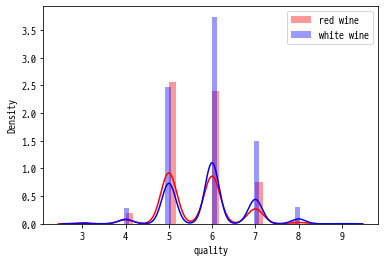

In [55]:
import seaborn as sns

sns.distplot(red_wine_quality, kde=True, color='red', label='red wine')
sns.distplot(white_wine_quality, kde=True, color='blue', label='white wine')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

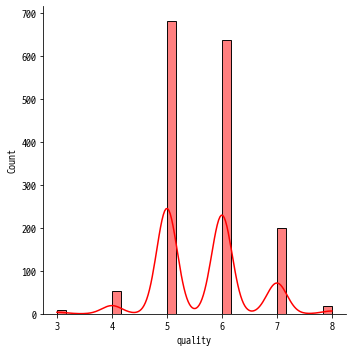

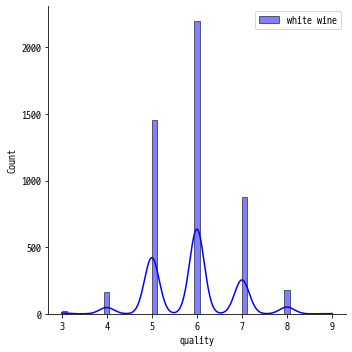

In [56]:
sns.displot(red_wine_quality, kde=True, color='red', label='red wine')
sns.displot(white_wine_quality, kde=True, color='blue', label='white wine')
plt.legend()
plt.show

## 한 화면에 여러개의 그래프를 그리는 방법
- 캔버스 : figure()
- 화면분할 : subplot(rows, cols, idx)

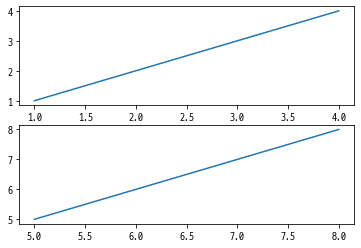

In [58]:
plt.figure() # figsize
# 2행 1열, 첫번쨰 그래프
plt.subplot(2, 1, 1)
plt.plot([1, 2, 3, 4], [1, 2, 3, 4])
# 2행 1열, 두번째 그래프
plt.subplot(2, 1, 2)
plt.plot([5, 6, 7, 8], [5, 6, 7, 8])
plt.show()

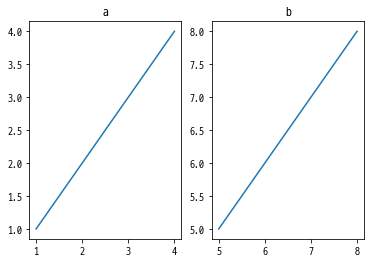

In [2]:
plt.figure()
# 1행 2열, 첫번째 그림
plt.subplot(1, 2, 1)
plt.plot([1, 2, 3, 4], [1, 2, 3, 4])
plt.title('a')
# 1행 2열, 두번째 그림
plt.subplot(1, 2, 2)
plt.plot([5, 6, 7, 8], [5, 6, 7, 8])
plt.title('b')
plt.show()

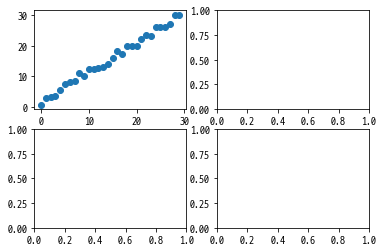

In [62]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.scatter(np.arange(30), np.arange(30)+3*np.random.rand(30))
plt.show()